<a href="https://colab.research.google.com/github/IsabelCamerini/SYSID-COURSEatPUC-Rio/blob/main/TakeHome6_Isabel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sysidentpy
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 92 kB 827 kB/s 
     |████████████████████████████████| 11.2 MB 11.0 MB/s 
     |████████████████████████████████| 960 kB 49.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.3 MB/s 


In [2]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sysidentpy 0.2.1 requires matplotlib>=3.3.2, but you have matplotlib 3.1.3 which is incompatible.


In [20]:
import sysidentpy
import os
from sysidentpy.model_structure_selection import FROLS
from sysidentpy.basis_function._basis_function import Polynomial, Fourier
from sysidentpy.general_estimators import NARX
from sklearn.ensemble import GradientBoostingRegressor
from sysidentpy.metrics import root_relative_squared_error
from sysidentpy.utils.generate_data import get_siso_data
from sysidentpy.utils.display_results import results
from sysidentpy.utils.plotting import plot_residues_correlation, plot_results
from sysidentpy.residues.residues_correlation import compute_residues_autocorrelation, compute_cross_correlation
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostRegressor
from sklearn.linear_model import BayesianRidge, ARDRegression
from sysidentpy.general_estimators import NARX


In [6]:
# Montar o drive para que o nosso script consiga acessar a base de dados.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
os.chdir('drive/MyDrive/SYSID/') 

In [8]:
!ls

Atividade_6_SYSID.ipynb  robot_arm.dat	TakeHome6-Isabel.ipynb


In [9]:
data = np.loadtxt(r"robot_arm.dat", unpack = True)

u = data[0].reshape(-1,1)
y = data[1].reshape(-1,1)
N = u.shape[0]

ind = 0.5 #percent train/test

u_train = u[:int(ind*N)-1]
y_train = y[:int(ind*N)-1]

u_test = u[int(ind*N):]
y_test = y[int(ind*N):]

Text(0.5, 1.0, 'output')

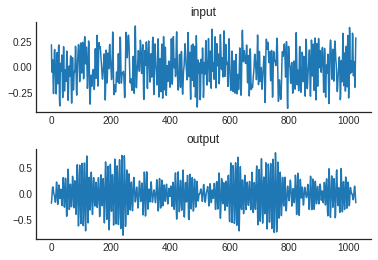

In [24]:


plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(u)
plt.title("input")
# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.plot(y)
plt.title("output")

In [25]:
basis_function = Polynomial(degree=2)

model = FROLS(
        order_selection=True,
        n_info_values=50,
        extended_least_squares=False,
        ylag=10, xlag=10,
        info_criteria='bic',
        estimator='recursive_least_squares',
        basis_function=basis_function
        )

model.fit(X=u_train,y=y_train)

In [26]:
yhat = model.predict(X=u_test, y=y_test)

In [27]:
rrse = root_relative_squared_error(y_test, yhat)
print("RRSE = "+str(rrse))
print("R² ="+str(r2_score(y_test, yhat)))

RRSE = 0.062194652453261286
R² =0.9961094724717058


In [28]:
r = pd.DataFrame(
	results(
		model.final_model, model.theta, model.err,
		model.n_terms, err_precision=8, dtype='sci'
		),
	columns=['Regressors', 'Parameters', 'ERR'])
print(r)

        Regressors   Parameters             ERR
0           y(k-4)   4.5232E-01  8.83660926E-01
1          x1(k-2)   1.4920E+00  3.25918019E-02
2          x1(k-7)   1.0007E+00  1.43539360E-02
3          y(k-10)  -6.2600E-02  5.03382752E-03
4           y(k-1)   1.9139E+00  3.66013997E-02
5           y(k-2)  -1.4826E+00  2.35823325E-02
6           y(k-3)  -2.9854E-03  3.98067144E-03
7           y(k-5)   7.6532E-02  7.26869918E-05
8           y(k-6)  -4.0203E-01  9.34725086E-05
9           y(k-7)  -1.4140E-01  1.43341522E-05
10          y(k-8)   4.8193E-01  1.35523695E-06
11          y(k-9)  -3.5452E-01  1.01744346E-06
12         x1(k-4)   1.2043E+00  5.91269220E-07
13  x1(k-8)x1(k-2)   1.2589E-03  1.06551866E-07
14  x1(k-10)y(k-1)   1.1958E-03  9.76930127E-08
15         x1(k-1)  -5.6849E-01  9.81184287E-08
16         x1(k-3)  -1.9312E+00  3.82049115E-06
17         x1(k-5)   3.4686E-01  2.57798886E-06
18         x1(k-6)  -1.1961E+00  4.28609367E-06
19         x1(k-8)  -4.0647E-01  1.84239

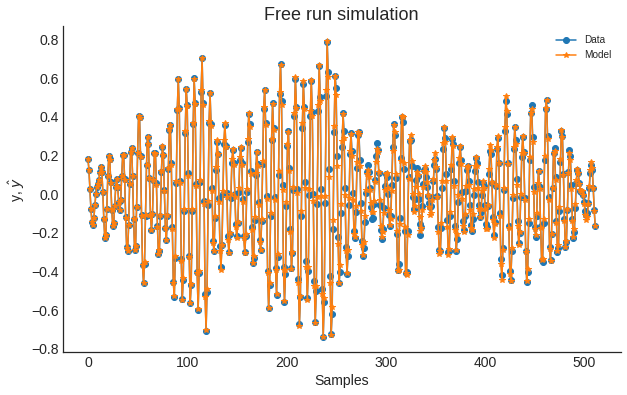

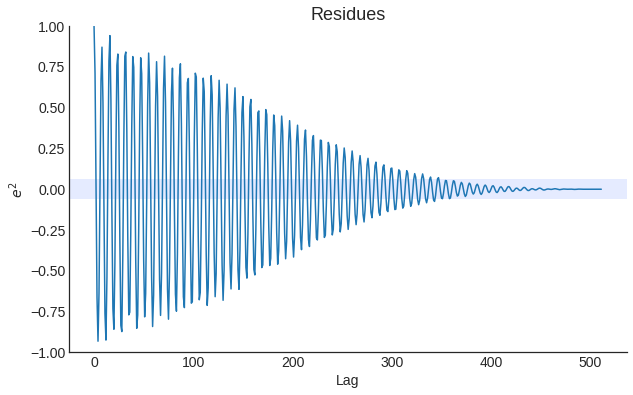

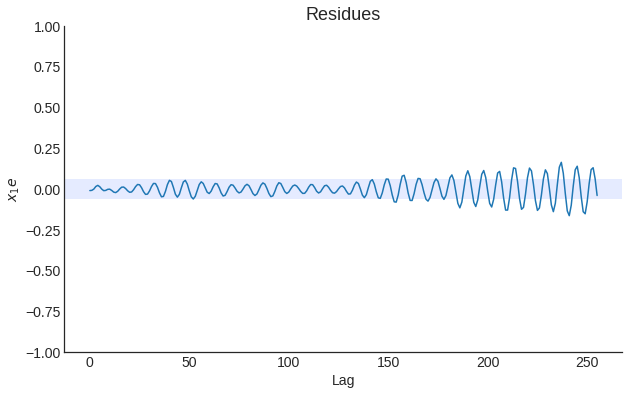

In [29]:
plot_results(y=y_test, yhat=yhat, n=1000)
ee = compute_residues_autocorrelation(y_test, yhat)
plot_residues_correlation(data=ee, title="Residues", ylabel="$e^2$")
x1e = compute_cross_correlation(y_test, yhat, u_test)
plot_residues_correlation(data=x1e, title="Residues", ylabel="$x_1e$")